In [1]:
from datasets import load_dataset
import json

/home/neel/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import json
import re
import random
import os
import seaborn as sns

In [3]:
# strg + shift + 7 for multi lines comment

In [4]:
# Get the current working directory (where the notebook is running)
script_dir = os.getcwd()

# Construct the path to your folder (assuming it's inside the repo)
dataset_folder_path = os.path.join(script_dir, "datasets")

# # Read the file
# with open(file_path, "r") as f:
#     content = f.read()
#     print(content)


In [5]:
# Access a file inside that folder
input_file = os.path.join(dataset_folder_path, "winogrande_validation.jsonl")
output_file = os.path.join(dataset_folder_path, "winogrande_val_splitup.jsonl")

In [6]:
import json
import re

# Load the dataset (assuming JSONL format)
def load_winogrande(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        return [json.loads(line) for line in f]

# Save the processed dataset
def save_dataset(data, output_file):
    with open(output_file, "w", encoding="utf-8") as f:
        for item in data:
            f.write(json.dumps(item) + "\n")

# Function to split a sentence, prioritizing "." (not at end), "than", then other punctuation
def split_sentence(sentence):
    # Prioritize "." but only if it's not at the end
    match = re.search(r"\.(?!$)", sentence)  # Ensures the period is not at the end
    if match:
        idx = match.start() + 1
        return sentence[:idx], sentence[idx:].strip()

    # If no ".", prioritize other punctuation (; , :)
    match = re.search(r"([,;:])", sentence)
    if match:
        idx = match.start() + 1  # Keep punctuation in part1
        return sentence[:idx], sentence[idx:].strip()

    # If "than" exists, split after the compared entity
    idx = sentence.find(" than ")
    if idx != -1:
        next_space = sentence.find(" ", idx + 6)  # Look after " than "
        if next_space != -1:
            return sentence[:next_space], sentence[next_space:].strip()

    # If no punctuation or "than", split in half at a word boundary
    mid = len(sentence) // 2
    while mid > 0 and sentence[mid] != " ":
        mid -= 1
    if mid == 0:
        mid = len(sentence) // 2
        while mid < len(sentence) and sentence[mid] != " ":
            mid += 1
    
    return sentence[:mid].strip(), sentence[mid:].strip()

# Process dataset
def process_dataset(dataset):
    new_data = []
    for item in dataset:
        sentence = item["sentence"]
        part1, part2 = split_sentence(sentence)
        new_data.append({"part1": part1, "part2": part2, **item})  # Keep original fields
    return new_data


In [9]:
import pandas as pd

In [11]:
input_file= os.path.join(dataset_folder_path, "winogrande_val_splitup.jsonl")

In [12]:
dataset = load_winogrande(input_file)
pd.DataFrame(dataset)

,part1,part2,sentence,option1,option2,answer
0,Sarah was a much better surgeon than Maria,so _ always got the easier cases.,Sarah was a much better surgeon than Maria so ...,Sarah,Maria,2
1,Sarah was a much better surgeon than Maria,so _ always got the harder cases.,Sarah was a much better surgeon than Maria so ...,Sarah,Maria,1
2,They were worried the wine would ruin the bed ...,but the _ was't ruined.,They were worried the wine would ruin the bed ...,blanket,bed,2
3,Terry tried to bake the eggplant in,the toaster oven but the _ was too big.,Terry tried to bake the eggplant in the toaste...,eggplant,toaster,1
4,"At night,",Jeffrey always stays up later than Hunter to w...,"At night, Jeffrey always stays up later than H...",Jeffrey,Hunter,1
...,...,...,...,...,...,...
1262,Kenneth was really scared to have surgery but ...,_ was under a lot of stress.,Kenneth was really scared to have surgery but ...,Kenneth,Neil,1
1263,Joel went to Michael 's house and consumed a l...,so _ had to ride back home as a passenger.,Joel went to Michael 's house and consumed a l...,Joel,Michael,1
1264,"At the new restaurant, Betty convinced Lindsey...",_ was relieved when she tried new things.,"At the new restaurant, Betty convinced Lindsey...",Betty,Lindsey,1
1265,Jane received a pet tortoise and an aquarium a...,but the _ was too small.,Jane received a pet tortoise and an aquarium a...,aquarium,tortoise,1


In [35]:
dataset = load_winogrande(input_file)
processed_data = process_dataset(dataset)  # Randomly choose method
save_dataset(processed_data, output_file)

print(f"Processed dataset saved to {output_file}")

Processed dataset saved to /home/neel/Desktop/Data-Comtamination-Sem-3-project/datasets/winogrande_val_splitup.jsonl


In [17]:
## for CB dataset
import pandas as pd

In [18]:
cb_file = os.path.join(dataset_folder_path, "CommitmentBank-items.csv")

In [ ]:
# Load the CSV file (update 'your_file.csv' with the actual file path)
df = pd.read_csv(cb_file)

# Extract relevant columns
df_context = df[['uID', 'Context']]
df_embedding = df[['uID', 'Embedding']]
df_target = df[['uID', 'Target']]

# Save to separate CSV files
df_context.to_csv("context_sentences.csv", index=False)
df_embedding.to_csv("prompt_sentences.csv", index=False)
df_target.to_csv("target_sentences.csv", index=False)

In [26]:
pd.read_csv(cb_file)

,Unnamed: 0,uID,Verb,Embedding,Context,Target,Prompt,ModalType,MatTense,MatSubjLemma,MatSubjPer,MatSubjNum,Embedding.1,genre,factive,mean.noTarget,sd.noTarget,Mean,SD,Reponses
0,1,BNC-1,admit,conditional,Polly had to think quickly.,They were still close enough to shore for him ...,Polly was not an experienced ocean sailor,NaN,future,she,third,singular,conditional,BNC,no,-0.111111,1.269296,2.000000,0.866025,"2, 3, 3, 1, 3, 1, 2, 1, 2"
1,2,BNC-1002,say,modal,"Nevertheless, life went on as it always does. ...",Indeed it could be said that they had prospered.,the Kiwi Keith and the Mackenzie houses had pr...,CI,present,it,third,singular,modal,BNC,no,1.200000,1.873796,1.875000,0.834523,"2, 1, 3, 1, 2, 2, 3, 1"
2,3,BNC-1003,say,modal,"He patted her hand. If he had chosen to, Thoma...",He might have said to her that some time in th...,some time in the middle of the nineteenth cent...,AB,present,he,third,singular,modal,BNC,no,-0.250000,0.462910,0.666667,1.154701,"2, 0, 1, 0, 0, 3, -1, 0, 1, 0, 0, 2"
3,4,BNC-1005,say,modal,She could see his distorted image in the slant...,Of course she could say it was for the childre...,it was for the children,AB,future,she,third,singular,modal,BNC,no,0.636364,1.120065,0.875000,0.991031,"2, 1, 0, 1, -1, 1, 1, 2"
4,5,BNC-1006,say,modal,"She glanced around the room, laying her hot fl...",Robyn swallowed and took a deep breath trying ...,it was all right,AB,future,she,third,singular,modal,BNC,no,-1.090909,1.044466,0.000000,2.309401,"3, 1, -2, -3, -3, 3, 2, 1, -1, -1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196,WSJ-95,feel,negation,"Across the board, these consumers value qualit...",Twenty percent don't even feel they are financ...,they are financially well off,NaN,present,twenty percent,third,plural,negation,WSJ,no,-1.750000,1.035098,-1.000000,2.371708,"-2, 3, -3, -3, -2, -3, -3, 2, -3, -1, 3, -3, 0..."
1196,1197,WSJ-96,mean,negation,The Fed has assumed a similar responsibility i...,This does not mean that the Federal Reserve do...,the Federal Reserve does not already play an i...,NaN,present,this,third,singular,negation,WSJ,no,-0.722222,1.964555,0.125000,2.028957,"2, -2, 3, 0, 2, 1, 2, -2, 2, 1, -1, 0, -2, -3,..."
1197,1198,WSJ-97,expect,modal,Under the Racketeer Influenced and Corrupt Org...,"In a letter, prosecutors told Mr. Antar's lawy...",any fees collected from Mr. Antar may be seized,AB,present,they,third,plural,modal,WSJ,no,1.600000,1.264911,2.058824,1.477777,"1, 3, -3, 3, 3, 3, 2, 2, 1, 2, 2, 3, 2, 2, 3, ..."
1198,1199,WSJ-98,believe,negation,"Talks between the two sides could unravel, of ...",And although Warner has said it wanted the pro...,the relationship could be repaired after the a...,NaN,present,they,third,plural,negation,WSJ,no,1.083333,1.378954,-1.733333,1.751190,"-1, -3, -3, -1, -2, 1, -3, -3, -3, -3, 2, -2, ..."


In [27]:
df = pd.read_csv(cb_file)[['uID', 'Embedding','Context', 'Target']]
df

,uID,Embedding,Context,Target
0,BNC-1,conditional,Polly had to think quickly.,They were still close enough to shore for him ...
1,BNC-1002,modal,"Nevertheless, life went on as it always does. ...",Indeed it could be said that they had prospered.
2,BNC-1003,modal,"He patted her hand. If he had chosen to, Thoma...",He might have said to her that some time in th...
3,BNC-1005,modal,She could see his distorted image in the slant...,Of course she could say it was for the childre...
4,BNC-1006,modal,"She glanced around the room, laying her hot fl...",Robyn swallowed and took a deep breath trying ...
...,...,...,...,...
1195,WSJ-95,negation,"Across the board, these consumers value qualit...",Twenty percent don't even feel they are financ...
1196,WSJ-96,negation,The Fed has assumed a similar responsibility i...,This does not mean that the Federal Reserve do...
1197,WSJ-97,modal,Under the Racketeer Influenced and Corrupt Org...,"In a letter, prosecutors told Mr. Antar's lawy..."
1198,WSJ-98,negation,"Talks between the two sides could unravel, of ...",And although Warner has said it wanted the pro...


In [4]:
from datasets import  load_dataset
import json

In [1]:
from datasets import load_dataset
import json

# Load dataset
dataset = load_dataset(
    "togethercomputer/RedPajama-Data-1T",
    name="wikipedia",
    split="train",
    streaming=True,
    trust_remote_code=True,
)

for example in dataset:
    print(type(example["meta"]))
    break  # Print only the first example


dataset = dataset.filter(
    lambda example: re.search(r"[\"']language[\"']:\s*[\"']en[\"']", example["meta"])
)


/home/neel/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'str'>


In [3]:
import re 

In [4]:
# # Print the first English sample
for index, sample in enumerate(dataset):
    print(sample)
    break


KeyboardInterrupt: 

In [39]:
from datasets import load_dataset

# Load only a small portion (e.g., 100 examples) of the RedPajama dataset
dataset = load_dataset("togethercomputer/RedPajama-Data-V2", name="default", split="train[:100]", languages=["en"])

# Print out the articles
for article in dataset:
    print(article['text'])
    print("=" * 80)  # Separator between articles



KeyboardInterrupt: 

In [4]:
from datasets import load_dataset

dataset = load_dataset(
    "ag_news",
    streaming=True,
    trust_remote_code=True,
    split="train",
)

for example in dataset:
    print(example.keys())
    break  # Print only the first example

dict_keys(['text', 'label'])


In [3]:
import pandas as pd
import numpy as np

# Create a larger sample DataFrame
np.random.seed(42)  # For reproducibility
df = pd.DataFrame({
    'A': np.arange(1, 11),
    'B': np.random.randint(10, 100, size=10)
})

print("Original DataFrame:")
print(df)

# Randomly select 4 rows from the DataFrame
small_df = df.sample(n=10, random_state=42)  # `random_state` ensures reproducibility

print("\nSmaller DataFrame:")
print(small_df)


Original DataFrame:
    A   B
0   1  61
1   2  24
2   3  81
3   4  70
4   5  30
5   6  92
6   7  96
7   8  84
8   9  84
9  10  97

Smaller DataFrame:
    A   B
8   9  84
1   2  24
5   6  92
0   1  61
7   8  84
2   3  81
9  10  97
4   5  30
3   4  70
6   7  96


In [1]:
import evaluate

/home/neel/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-18 10:10:11.301045: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742289011.367380   10740 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742289011.387350   10740 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-18 10:10:11.548358: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-

In [ ]:
bleurt = evaluate.load(
        "bleurt", module_type="metric", checkpoint="BLEURT-20"
    )
rouge = evaluate.load("rouge")


In [ ]:
prediction

In [ ]:
bleurt_score = bleurt.compute(predictions=[prediction], references=[gold])
rouge_score = rouge.compute(predictions=[prediction], references=[gold])

In [ ]:
operating system in the same month that hundreds of thousands of students are reporting to college campuses across the|Windows operating system has caused campus-wide disruptions, leaving students and faculty frustrated with the upgrade's impact on their daily routines. The university's IT department has been working around the clock to resolve the issues, but many are still experiencing problems. The upgrade, which was intended to improve performance and security, has instead led to a series of unexpected errors and glitches. Students are finding it difficult to access their email and online courses, while faculty members are struggling to use the new software in their classrooms. The university|"Windows operating system has been causing frustration among students and faculty at the University of California, Berkeley. The upgrade, which was released in June, has been plagued by bugs and glitches, leaving many users unable to access their files or use certain features. ""It's been a nightmare,"" said one student, who wished to remain anonymous. ""I've lost count of how many times I've had to restart my computer."" The university's IT department has been working around the clock to resolve the issues, but"

In [ ]:
# new case march 2024, 
# 
# example 67

# even better, (this is actually a very good example i must say)
# 96|After Wait, Google Set for Market Debut  NEW YORK (Reuters) -|Shares of Google Inc. will make their  Nasdaq stock market debut on Thursday after the year's most  anticipated initial public offering priced far below initial  estimates, raising \$1.67 billion.|"Google Inc (GOOG.O) is set to make its market debut on Thursday, a day after the Internet search leader's IPO filing was made public. The company, which is expected to raise $2.7 billion in the offering, will trade on the Nasdaq under the symbol ""GOOG."" Google's IPO filing, which was made public on Wednesday, said the company had 1,000 employees in the United States and 2,000 worldwide. The company, which was founded in"|"Google Inc (GOOG.O) will begin trading on the Nasdaq Stock Market on Thursday, the company said on Wednesday, as the Internet search leader prepares to go public. The Mountain View, California-based company, which is expected to raise as much as $2.7 billion in the offering, will trade under the symbol ""GOOG."" The stock will begin trading at 9 a.m. EDT (1300 GMT) on the Nasdaq Global Select Market, the company said in a statement"

In [ ]:
# some signature of contamination!
# AG NEWS
# 55|Spam suspension hits Sohu.com shares (FT.com) FT.com - Shares in Sohu.com, a leading US-listed Chinese|internet portal, fell more than 10 per cent on Friday after China's biggest mobile phone network operator imposed a one-year suspension on its multimedia messaging services because of customers being sent spam.|"...after the Chinese government announced a suspension of online content, citing concerns over the spread of ""harmful"" information. The move was seen as a response to the recent surge in online protests against the government's handling of the SARS outbreak. The suspension affects Sohu.com's online advertising business, which generates a significant portion of its revenue. The company's shares have been under pressure since the announcement, and the decline in shares is expected to continue in the coming days. The Chinese government has"|"internet portal, fell by 3.4% in the wake of a suspension of the company's shares by the New York Stock
#             Exchange. The suspension was imposed after the company's shares fell by 10% in a single day. The New York Stock
#             Exchange has imposed a suspension on Sohu.com's shares after the company's shares fell by 10% in a single day. The
#             suspension was imposed after the company's shares fell by 10% in a single"|-0.48113951086997986|-0.5077968239784241|0.026657313108444214|0.15789473684210528|0.07272727272727272|0.08516746411483256


#AG NEWS
# 506|Cisco to acquire P-Cube for \$200M SAN JOSE, Calif.Cisco Systems Inc. said it has agreed to acquire P-Cube for \$200|million in stock and cash to enable service providers to further control and manage such advanced Internet Protocol services|"...said it has agreed to acquire P-Cube Inc., a maker of network virtualization software, for $200 million. The deal, which is expected to close in the second half of this year, will give Cisco a foothold in the growing market for virtualized networks. P-Cube's software allows companies to create virtual networks that can be easily replicated and managed across multiple locations. The acquisition is part of Cisco's strategy to expand its offerings in the virtualization space. ""We're excited"|million in cash and stock. P-Cube, a maker of network switching equipment, will continue to operate as a subsidiary of Cisco. The acquisition is expected to close in the second half of 2000. P-Cube's products will be integrated into Cisco's existing product line. The acquisition is seen as a strategic move by Cisco to strengthen its position in the network switching market. P-Cube's products are used in a variety of applications, including Internet access, video conferencing and data communications


In [ ]:
# with new prompts, some word detection:

# 43 (detected afghanistan)|Around the world The bombing of a UN election|office in Afghanistan that injured six policemen drew calls from a UN union Friday for a withdrawal of staffers from the embattled nation.|center in the capital city of a small country in Africa killed 100 people. The country is a member of the United Nations. The country is a member of the African Union. The country is a member of the Organization of African Unity. The country is a member of the Commonwealth. The country is a member of the Arab League. The country is a member of the Organization of Islamic Cooperation. The country is a member of the Non-Aligned Movement. The country is a member of the World Trade|office in Afghanistan has killed at least 20 people, including a UN staff member, and wounded 40 others. The attack in Kabul came as the UN was preparing to announce the results of the country's first democratic election. The UN said the office was hit by a suicide bomber. The attack took place as the UN was preparing to announce the results of the country's first democratic election. The UN said the office was hit by a suicide bomber. The attack took place as the UN was preparing to|-0.44647255539894104|-1.1348098516464233|0.6883372962474823|0.14035087719298245|0.10619469026548674|0.03415618692749571 



In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


def verify_or_create_dir(path: str):
    """
    Verify if a directory exists, if not create it.
    """
    if not os.path.exists(path):
        os.makedirs(path)


def read_df(path: str):
    """
    Read a CSV file into a DataFrame.
    """
    with open(path, "r") as f:
        df = pd.read_csv(f, sep="|")
    return df


def get_highest_score(df: pd.DataFrame, column: str):
    """
    Get the highest score from a DataFrame.
    """
    return df[df[column] == df[column].min()]


def get_lowest_score(df: pd.DataFrame, column: str):
    """
    Get the lowest score from a DataFrame.
    """
    return df[df[column] == df[column].max()]


def print_min_max(df, metric, res_dir):
    """
    Print the minimum and maximum values of a metric in a DataFrame.
    """
    
    for type in ["guided", "unguided"]:
        res_path = os.path.join(res_dir, f"{metric}_{type}_min_max.txt")
        highest = get_highest_score(df, f"{metric} {type}")
        print(f"Highest {metric} {type} score: {highest}")
        lowest = get_lowest_score(df, f"{metric} {type}")
        print(f"Lowest {metric} {type} score: {lowest}")

        with open(res_path, "w") as f:
            f.write(f"Highest {metric} {type} score: {highest.to_string()} \n")
            f.write(f"Lowest {metric} {type} score: {lowest.to_string()} \n")


def calculate_correlation(df: pd.DataFrame, task: str, res_dir: str, write_in_file:bool = 1, return_scores:bool=0):
    """
    Calculate the correlation between BLEURT and ROUGEL.
    """
    res_path = os.path.join(res_dir, f"{task}_correlation.txt")
    unguided_corr = df["BLEURT unguided"].corr(df["ROUGEL unguided"], method="spearman")
    guided_corr = df["BLEURT guided"].corr(df["ROUGEL guided"], method="spearman")
    diff_corr = df["BLEURT_diff"].corr(df["ROUGEL_diff"], method="spearman")
    print(f"Unguided correlation: {unguided_corr}")
    print(f"Guided correlation: {guided_corr}")
    print(f"Difference correlation: {diff_corr}")

    if write_in_file:
        with open(res_path, "w") as f:
            f.write(f"Correclation between BLEURT and ROUGEL unguided: {unguided_corr} \n")
            f.write(f"Correclation between BLEURT and ROUGEL guided: {guided_corr} \n")
            f.write(f"Correclation between BLEURT and ROUGEL differences: {diff_corr} \n")
    if return_scores:
        return unguided_corr, guided_corr, diff_corr


def plot_corr(df: pd.DataFrame, task: str, res_dir: str):
    """
    Plot the correlation of the dataframe.
    """
    res_path = os.path.join(res_dir, f"{task}_guided_scores.png")
    unguided_corr = df["BLEURT unguided"].corr(df["ROUGEL unguided"], method="spearman")
    plt.figure()
    plt.scatter(df["BLEURT guided"], df["ROUGEL guided"], label="Guided")
    plt.xlabel("BLEURT guided")
    plt.ylabel("ROUGEL unguided")
    plt.title(f"Spearman correlation: {unguided_corr}")
    plt.legend()
    plt.savefig(res_path)
    plt.close()

    res_path = os.path.join(res_dir, f"{task}_unguided_scores.png")
    guided_corr = df["BLEURT guided"].corr(df["ROUGEL guided"], method="spearman")
    plt.figure()
    plt.scatter(df["BLEURT unguided"], df["ROUGEL unguided"], label="Unguided")
    plt.xlabel("BLEURT unguided")
    plt.ylabel("ROUGEL unguided")
    plt.title(f"Spearman correlation: {guided_corr}")
    plt.legend()
    plt.savefig(res_path)
    plt.close()

    res_path = os.path.join(res_dir, f"{task}_differences_scores.png")
    diff_corr = df["BLEURT_diff"].corr(df["ROUGEL_diff"], method="spearman")
    plt.figure()
    plt.scatter(df["BLEURT_diff"], df["ROUGEL_diff"], label="Difference")
    plt.xlabel("BLEURT_diff")
    plt.ylabel("ROUGEL_diff")
    plt.title(f"Spearman correlation: {diff_corr}")
    plt.legend()
    plt.savefig(res_path)
    plt.close()


def plot_scores(df: pd.DataFrame, metric: str, task: str, res_dir: str):
    """
    Plot the scores of the dataframe.
    """
    res_path = os.path.join(res_dir, f"{task}_{metric}_scores.png")
    plt.figure(figsize=(12, 6), dpi=200)
    plt.plot(df[f"{metric} guided"], "o", label=f"Guided {metric}")
    plt.plot(df[f"{metric} unguided"], "+", label=f"Unguided {metric}")
    plt.xlabel("Index")
    plt.ylabel(f"{metric}")
    plt.legend()
    plt.savefig(res_path)


def main():
    verify_or_create_dir("results_llama")
    res_dir = "results_llama"

    for task in ["agnews", "imdb"]:
        # /home/neel/Desktop/results_llama
        #/home/neel/Desktop/Data-Comtamination-Sem-3-project/results_complete_Llama_25_mar/results/Llama/agnews/agnews_Llama_differences.csv
        path = os.path.join(
            f"/home/neel/Desktop/Data-Comtamination-Sem-3-project/results_complete_Llama_25_mar/results/Llama/{task}", f"{task}_Llama_differences.csv"
        )
        print(f"Reading {path}")
        df = read_df(path=path)
        num_samples_list = [10, 100, 500, 1000, df.shape[0]]
        print('seeing what is in the data frame:')
        headers = df.columns.tolist()
        print(headers)
        for num_samples in num_samples_list:
            
            task_num_samples = f"{task}_{num_samples}"
            if num_samples <1000: 
                mean_list_unguided_bleurt, mean_list_guided_bleurt=[],[]
                mean_list_unguided_rouge, mean_list_unguided_rouge = [],[]
                for i in range(0,10):
                    sample_df = df.sample(n=num_samples, random_state=i)
                    #bleurt scores
                    unguided_corr = sample_df["BLEURT unguided"].corr(sample_df["ROUGEL unguided"], method="spearman")
                    guided_corr = sample_df["BLEURT guided"].corr(sample_df["ROUGEL guided"], method="spearman")
                    mean_list_unguided_bleurt.append(unguided_corr)
                    mean_list_guided_bleurt.append(guided_corr)

                    # rouge scores:
                    
                
                print(f'for task: {task} and num_samples: {num_samples}')
                print(f'unguided correlation is: {np.mean(mean_list_unguided_bleurt)} +- {np.std(mean_list_unguided_bleurt)}')
                print(f'guided correlation is: {np.mean(mean_list_guided_bleurt)} +- {np.std(mean_list_guided_bleurt)}')
        #     print_min_max(df=sample_df, metric="BLEURT", res_dir=res_dir)
        #     print_min_max(df=sample_df, metric="ROUGEL", res_dir=res_dir)
        #     calculate_correlation(df=sample_df, task=task_num_samples, res_dir=res_dir)

        #     plot_corr(df=sample_df, task=task_num_samples, res_dir=res_dir)
        #     plot_scores(
        #         df=sample_df, metric="BLEURT", task=task_num_samples, res_dir=res_dir
        #     )
        #     plot_scores(
        #         df=sample_df, metric="ROUGEL", task=task_num_samples, res_dir=res_dir
        #     )


if __name__ == "__main__":
    main()


Reading /home/neel/Desktop/Data-Comtamination-Sem-3-project/results_complete_Llama_25_mar/results/Llama/agnews/agnews_Llama_differences.csv
seeing what is in the data frame:
['Index', 'First piece', 'Gold', 'Prediction unguided', 'Prediction guided', 'BLEURT guided', 'BLEURT unguided', 'BLEURT_diff', 'ROUGEL guided', 'ROUGEL unguided', 'ROUGEL_diff']
for task: agnews and num_samples: 10
unguided correlation is: 0.49212121212121207 +- 0.3305981445042887
guided correlation is: 0.521641991677455 +- 0.2686820470042252
for task: agnews and num_samples: 100
unguided correlation is: 0.5883970576692603 +- 0.0678997441769322
guided correlation is: 0.5651783189644297 +- 0.0579520542680213
for task: agnews and num_samples: 500
unguided correlation is: 0.5743107485869501 +- 0.027035469858377716
guided correlation is: 0.5604959588880272 +- 0.01591113488031677
Reading /home/neel/Desktop/Data-Comtamination-Sem-3-project/results_complete_Llama_25_mar/results/Llama/imdb/imdb_Llama_differences.csv
seein

In [ ]:
# plotting correlation and p value matrices for different tasks



Reading /home/neel/Desktop/Data-Comtamination-Sem-3-project/llama_results_3.2_3b/Llama/agnews/agnews_Llama_differences.csv
seeing what is in the data frame:
['Index', 'First piece', 'Gold', 'Prediction unguided', 'Prediction guided', 'BLEURT guided', 'BLEURT unguided', 'BLEURT_diff', 'ROUGEL guided', 'ROUGEL unguided', 'ROUGEL_diff']
for task: agnews and num_samples: 10
unguided correlation is: 0.49090909090909085 +- 0.0
guided correlation is: 0.13939393939393938 +- 0.0
for task: agnews and num_samples: 10
unguided correlation is: 0.6242424242424242 +- 0.1333333333333333
guided correlation is: 0.4242424242424242 +- 0.2848484848484848
for task: agnews and num_samples: 10
unguided correlation is: 0.4404778379088187 +- 0.2817635502199923
guided correlation is: 0.24848484848484845 +- 0.3404025417345542
for task: agnews and num_samples: 10
unguided correlation is: 0.3167220147952504 +- 0.3247915253481547
guided correlation is: 0.2212121212121212 +- 0.2985579052264173
for task: agnews and nu

/tmp/ipykernel_8245/2141540720.py:339: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_bl = df2_bl.applymap(format_values)


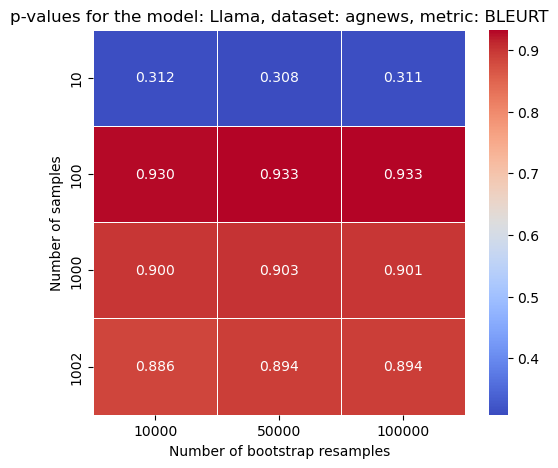

ROUGE


/tmp/ipykernel_8245/2141540720.py:354: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_rouge = df2_rouge.applymap(format_values)


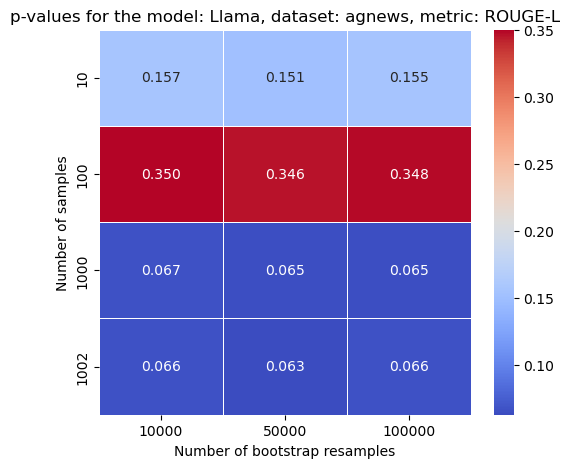

Reading /home/neel/Desktop/Data-Comtamination-Sem-3-project/llama_results_3.2_3b/Llama/imdb/imdb_Llama_differences.csv
seeing what is in the data frame:
['Index', 'First piece', 'Gold', 'Prediction unguided', 'Prediction guided', 'BLEURT guided', 'BLEURT unguided', 'BLEURT_diff', 'ROUGEL guided', 'ROUGEL unguided', 'ROUGEL_diff']
for task: imdb and num_samples: 10
unguided correlation is: 0.6606060606060605 +- 0.0
guided correlation is: 0.34545454545454546 +- 0.0
for task: imdb and num_samples: 10
unguided correlation is: 0.4606060606060606 +- 0.19999999999999996
guided correlation is: 0.19393939393939394 +- 0.15151515151515152
for task: imdb and num_samples: 10
unguided correlation is: 0.3090909090909091 +- 0.2694074032835499
guided correlation is: -0.03434343434343432 +- 0.345732064085356
for task: imdb and num_samples: 10
unguided correlation is: 0.18181818181818182 +- 0.3209833376209784
guided correlation is: 1.3877787807814457e-17 +- 0.30526449113849763
for task: imdb and num_samp

/tmp/ipykernel_8245/2141540720.py:339: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_bl = df2_bl.applymap(format_values)


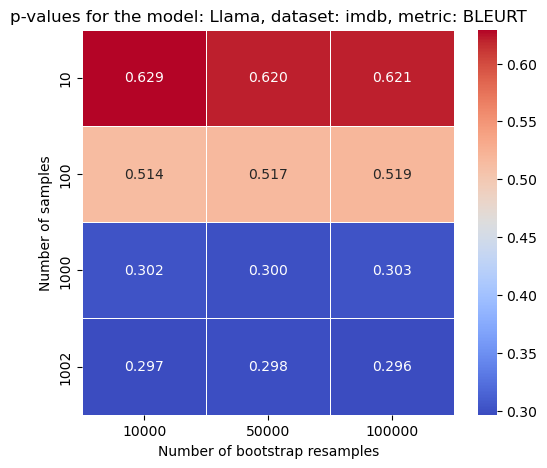

ROUGE


/tmp/ipykernel_8245/2141540720.py:354: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_rouge = df2_rouge.applymap(format_values)


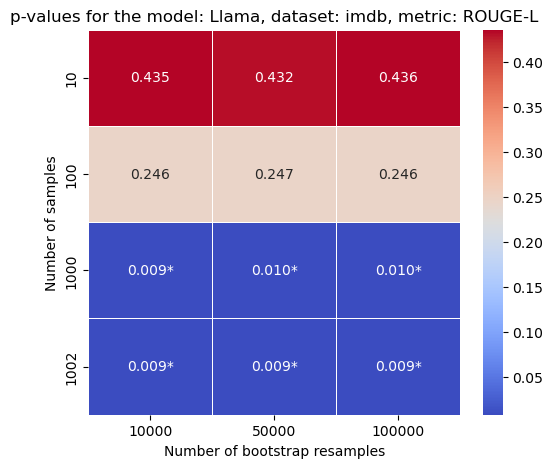

In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns


def verify_or_create_dir(path: str):
    """
    Verify if a directory exists, if not create it.
    """
    if not os.path.exists(path):
        os.makedirs(path)


def read_df(path: str):
    """
    Read a CSV file into a DataFrame.
    """
    with open(path, "r") as f:
        df = pd.read_csv(f, sep="|")
    return df


def get_highest_score(df: pd.DataFrame, column: str):
    """
    Get the highest score from a DataFrame.
    """
    return df[df[column] == df[column].min()]


def get_lowest_score(df: pd.DataFrame, column: str):
    """
    Get the lowest score from a DataFrame.
    """
    return df[df[column] == df[column].max()]


def print_min_max(df, metric, res_dir):
    """
    Print the minimum and maximum values of a metric in a DataFrame.
    """
    
    for type in ["guided", "unguided"]:
        res_path = os.path.join(res_dir, f"{metric}_{type}_min_max.txt")
        highest = get_highest_score(df, f"{metric} {type}")
        print(f"Highest {metric} {type} score: {highest}")
        lowest = get_lowest_score(df, f"{metric} {type}")
        print(f"Lowest {metric} {type} score: {lowest}")

        with open(res_path, "w") as f:
            f.write(f"Highest {metric} {type} score: {highest.to_string()} \n")
            f.write(f"Lowest {metric} {type} score: {lowest.to_string()} \n")


def calculate_correlation(df: pd.DataFrame, task: str, res_dir: str):
    """
    Calculate the correlation between BLEURT and ROUGEL.
    """
    res_path = os.path.join(res_dir, f"{task}_correlation.txt")
    unguided_corr = df["BLEURT unguided"].corr(df["ROUGEL unguided"], method="spearman")
    guided_corr = df["BLEURT guided"].corr(df["ROUGEL guided"], method="spearman")
    diff_corr = df["BLEURT_diff"].corr(df["ROUGEL_diff"], method="spearman")
    print(f"Unguided correlation: {unguided_corr}")
    print(f"Guided correlation: {guided_corr}")
    print(f"Difference correlation: {diff_corr}")

    with open(res_path, "w") as f:
        f.write(f"Correclation between BLEURT and ROUGEL unguided: {unguided_corr} \n")
        f.write(f"Correclation between BLEURT and ROUGEL guided: {guided_corr} \n")
        f.write(f"Correclation between BLEURT and ROUGEL differences: {diff_corr} \n")


def plot_corr(df: pd.DataFrame, task: str, res_dir: str):
    """
    Plot the correlation of the dataframe.
    """
    res_path = os.path.join(res_dir, f"{task}_guided_scores.png")
    unguided_corr = df["BLEURT unguided"].corr(df["ROUGEL unguided"], method="spearman")
    plt.figure()
    plt.scatter(df["BLEURT guided"], df["ROUGEL guided"], label="Guided")
    plt.xlabel("BLEURT guided")
    plt.ylabel("ROUGEL unguided")
    plt.title(f"Spearman correlation: {unguided_corr}")
    plt.legend()
    plt.savefig(res_path)
    plt.close()

    res_path = os.path.join(res_dir, f"{task}_unguided_scores.png")
    guided_corr = df["BLEURT guided"].corr(df["ROUGEL guided"], method="spearman")
    plt.figure()
    plt.scatter(df["BLEURT unguided"], df["ROUGEL unguided"], label="Unguided")
    plt.xlabel("BLEURT unguided")
    plt.ylabel("ROUGEL unguided")
    plt.title(f"Spearman correlation: {guided_corr}")
    plt.legend()
    plt.savefig(res_path)
    plt.close()

    res_path = os.path.join(res_dir, f"{task}_differences_scores.png")
    diff_corr = df["BLEURT_diff"].corr(df["ROUGEL_diff"], method="spearman")
    plt.figure()
    plt.scatter(df["BLEURT_diff"], df["ROUGEL_diff"], label="Difference")
    plt.xlabel("BLEURT_diff")
    plt.ylabel("ROUGEL_diff")
    plt.title(f"Spearman correlation: {diff_corr}")
    plt.legend()
    plt.savefig(res_path)
    plt.close()


def plot_scores(df: pd.DataFrame, metric: str, task: str, res_dir: str):
    """
    Plot the scores of the dataframe.
    """
    res_path = os.path.join(res_dir, f"{task}_{metric}_scores.png")
    plt.figure(figsize=(12, 6), dpi=200)
    plt.plot(df[f"{metric} guided"], "o", label=f"Guided {metric}")
    plt.plot(df[f"{metric} unguided"], "+", label=f"Unguided {metric}")
    plt.xlabel("Index")
    plt.ylabel(f"{metric}")
    plt.legend()
    plt.savefig(res_path)


import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


def verify_or_create_dir(path: str):
    """
    Verify if a directory exists, if not create it.
    """
    if not os.path.exists(path):
        os.makedirs(path)


def read_df(path: str):
    """
    Read a CSV file into a DataFrame.
    """
    with open(path, "r") as f:
        df = pd.read_csv(f, sep="|")
    return df


def get_highest_score(df: pd.DataFrame, column: str):
    """
    Get the highest score from a DataFrame.
    """
    return df[df[column] == df[column].min()]


def get_lowest_score(df: pd.DataFrame, column: str):
    """
    Get the lowest score from a DataFrame.
    """
    return df[df[column] == df[column].max()]


def print_min_max(df, metric, res_dir):
    """
    Print the minimum and maximum values of a metric in a DataFrame.
    """
    
    for type in ["guided", "unguided"]:
        res_path = os.path.join(res_dir, f"{metric}_{type}_min_max.txt")
        highest = get_highest_score(df, f"{metric} {type}")
        print(f"Highest {metric} {type} score: {highest}")
        lowest = get_lowest_score(df, f"{metric} {type}")
        print(f"Lowest {metric} {type} score: {lowest}")

        with open(res_path, "w") as f:
            f.write(f"Highest {metric} {type} score: {highest.to_string()} \n")
            f.write(f"Lowest {metric} {type} score: {lowest.to_string()} \n")


def calculate_correlation(df: pd.DataFrame, task: str, res_dir: str, write_in_file:bool = 1, return_scores:bool=0):
    """
    Calculate the correlation between BLEURT and ROUGEL.
    """
    res_path = os.path.join(res_dir, f"{task}_correlation.txt")
    unguided_corr = df["BLEURT unguided"].corr(df["ROUGEL unguided"], method="spearman")
    guided_corr = df["BLEURT guided"].corr(df["ROUGEL guided"], method="spearman")
    diff_corr = df["BLEURT_diff"].corr(df["ROUGEL_diff"], method="spearman")
    print(f"Unguided correlation: {unguided_corr}")
    print(f"Guided correlation: {guided_corr}")
    print(f"Difference correlation: {diff_corr}")

    if write_in_file:
        with open(res_path, "w") as f:
            f.write(f"Correclation between BLEURT and ROUGEL unguided: {unguided_corr} \n")
            f.write(f"Correclation between BLEURT and ROUGEL guided: {guided_corr} \n")
            f.write(f"Correclation between BLEURT and ROUGEL differences: {diff_corr} \n")
    if return_scores:
        return unguided_corr, guided_corr, diff_corr


def plot_corr(df: pd.DataFrame, task: str, res_dir: str):
    """
    Plot the correlation of the dataframe.
    """
    res_path = os.path.join(res_dir, f"{task}_guided_scores.png")
    unguided_corr = df["BLEURT unguided"].corr(df["ROUGEL unguided"], method="spearman")
    plt.figure()
    plt.scatter(df["BLEURT guided"], df["ROUGEL guided"], label="Guided")
    plt.xlabel("BLEURT guided")
    plt.ylabel("ROUGEL unguided")
    plt.title(f"Spearman correlation: {unguided_corr}")
    plt.legend()
    plt.savefig(res_path)
    plt.close()

    res_path = os.path.join(res_dir, f"{task}_unguided_scores.png")
    guided_corr = df["BLEURT guided"].corr(df["ROUGEL guided"], method="spearman")
    plt.figure()
    plt.scatter(df["BLEURT unguided"], df["ROUGEL unguided"], label="Unguided")
    plt.xlabel("BLEURT unguided")
    plt.ylabel("ROUGEL unguided")
    plt.title(f"Spearman correlation: {guided_corr}")
    plt.legend()
    plt.savefig(res_path)
    plt.close()

    res_path = os.path.join(res_dir, f"{task}_differences_scores.png")
    diff_corr = df["BLEURT_diff"].corr(df["ROUGEL_diff"], method="spearman")
    plt.figure()
    plt.scatter(df["BLEURT_diff"], df["ROUGEL_diff"], label="Difference")
    plt.xlabel("BLEURT_diff")
    plt.ylabel("ROUGEL_diff")
    plt.title(f"Spearman correlation: {diff_corr}")
    plt.legend()
    plt.savefig(res_path)
    plt.close()


def plot_scores(df: pd.DataFrame, metric: str, task: str, res_dir: str):
    """
    Plot the scores of the dataframe.
    """
    res_path = os.path.join(res_dir, f"{task}_{metric}_scores.png")
    plt.figure(figsize=(12, 6), dpi=200)
    plt.plot(df[f"{metric} guided"], "o", label=f"Guided {metric}")
    plt.plot(df[f"{metric} unguided"], "+", label=f"Unguided {metric}")
    plt.xlabel("Index")
    plt.ylabel(f"{metric}")
    plt.legend()
    plt.savefig(res_path)


def main():
    verify_or_create_dir("results_llama")
    res_dir = "results_llama"

    for task in ["agnews", "imdb"]:
        # /home/neel/Desktop/results_llama
        #/home/neel/Desktop/Data-Comtamination-Sem-3-project/results_complete_Llama_25_mar/results/Llama/agnews/agnews_Llama_differences.csv
        path_correlation = os.path.join(
            f"/home/neel/Desktop/Data-Comtamination-Sem-3-project/llama_results_3.2_3b/Llama/{task}", f"{task}_Llama_differences.csv"
        )
        print(f"Reading {path_correlation}")
        df = read_df(path=path_correlation)
        num_samples_list = [10, 100, 1000, df.shape[0]]
        num_resample_list= [10000, 50000, 100000]
        print('seeing what is in the data frame:')
        headers = df.columns.tolist()
        print(headers)
        for num_samples in num_samples_list:
            
            task_num_samples = f"{task}_{num_samples}"
            if num_samples <1000: 
                mean_list_unguided, mean_list_guided=[],[]
                for i in range(0,10):
                    sample_df = df.sample(n=num_samples, random_state=i)
                    #bleurt scores
                    unguided_corr = sample_df["BLEURT unguided"].corr(sample_df["ROUGEL unguided"], method="spearman")
                    guided_corr = sample_df["BLEURT guided"].corr(sample_df["ROUGEL guided"], method="spearman")
                    mean_list_unguided.append(unguided_corr)
                    mean_list_guided.append(guided_corr)

                    print(f'for task: {task} and num_samples: {num_samples}')
                    print(f'unguided correlation is: {np.mean(mean_list_unguided)} +- {np.std(mean_list_unguided)}')
                    print(f'guided correlation is: {np.mean(mean_list_guided)} +- {np.std(mean_list_guided)}')
            else: 
                sample_df = df.sample(n=num_samples, random_state=42)
                #bleurt scores
                unguided_corr = sample_df["BLEURT unguided"].corr(sample_df["ROUGEL unguided"], method="spearman")
                guided_corr = sample_df["BLEURT guided"].corr(sample_df["ROUGEL guided"], method="spearman")

                print(f'for task: {task} and num_samples: {num_samples}')
                print(f'unguided correlation is: {unguided_corr}')
                print(f'guided correlation is: {guided_corr}')
                
        print('_'*100) 

        # row labels would be number of samples and colm labels would be number of resamplings
        df2_rouge= pd.DataFrame(index= num_samples_list, columns= num_resample_list)
        df2_bl= pd.DataFrame(index= num_samples_list, columns= num_resample_list)
        for num_samples in num_samples_list:
            for num_resample  in num_resample_list:
                # set the file name
                path_p_vals = os.path.join(
                    f"/home/neel/Desktop/Data-Comtamination-Sem-3-project/llama_results_3.2_3b/Llama/{task}", f"{task}_Llama_differences_p_values_{num_resample}_{num_samples}.txt"
                )
                # read the file
                with open(path_p_vals, "r") as file:
                    content = file.read()

                # get the p values for ROUGE-L and BLEURT model
                # Regular expression pattern to capture metric and p-value
                pattern = r"([A-Z\-]+) p-value, ([\d\.]+)"

                # Extract matches
                matches = re.findall(pattern, content)

                # Convert to dictionary
                p_values = {metric: float(value) for metric, value in matches}

                df2_rouge.at[num_samples, num_resample] = p_values['ROUGE-L']
                df2_bl.at[num_samples, num_resample] = p_values['BLEURT']

        print('rouge'); print(df2_rouge)
        print('BLEURT'); print(df2_bl)

        # Define threshold for significance
        threshold = 0.05

        # Function to format values with an asterisk if below threshold
        def format_values(val):
            return f"{val:.3f}*" if val < threshold else f"{val:.3f}"

        # BLEURT Heatmap
        print("BLEURT")
        df2_bl = df2_bl.apply(pd.to_numeric, errors="coerce")  # Convert to numeric

        # Create annotation matrix
        annot_bl = df2_bl.applymap(format_values)

        plt.figure(figsize=(6, 5))  
        sns.heatmap(df2_bl, annot=annot_bl, cmap="coolwarm", fmt="", linewidths=0.5)

        plt.ylabel("Number of samples")
        plt.xlabel("Number of bootstrap resamples")
        plt.title(f"p-values for the model: Llama, dataset: {task}, metric: BLEURT")
        plt.show()

        # ROUGE Heatmap
        print("ROUGE")
        df2_rouge = df2_rouge.apply(pd.to_numeric, errors="coerce")  # Convert to numeric

        # Create annotation matrix
        annot_rouge = df2_rouge.applymap(format_values)

        plt.figure(figsize=(6, 5))  
        sns.heatmap(df2_rouge, annot=annot_rouge, cmap="coolwarm", fmt="", linewidths=0.5)

        plt.ylabel("Number of samples")
        plt.xlabel("Number of bootstrap resamples")
        plt.title(f"p-values for the model: Llama, dataset: {task}, metric: ROUGE-L")
        plt.show()


if __name__ == "__main__":
    main()

###
# import re

# # Sample text from your file
# text = """Results of bootstrapping
# Number of resamples: 10000, number of samples: 10
# BLEURT p-value, 0.11229999999999996 	 Not Significant
# ROUGE-L p-value, 1.0 	 Not Significant"""

# # Regular expression pattern to capture metric and p-value
# pattern = r"(\w+-?\w*) p-value, ([\d\.]+)"

# # Extract matches
# matches = re.findall(pattern, text)
# print(f"matches are: {matches}")

# # Convert to dictionary
# p_values = {metric: float(value) for metric, value in matches}

# print(p_values)
